**Analisando colunas e sua descricao:**

Files: train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format

Columns: id: Identificador único da listagem.

listing_url: URL da página da listagem na plataforma.

scrape_id: Identificador único da operação de coleta de dados (scrape).

last_scraped: Data da última vez que os dados foram coletados.

name: Nome da propriedade.

summary: Resumo curto da propriedade.

space: Descrição do espaço da propriedade, incluindo áreas comuns e privadas.

description: Descrição detalhada da propriedade, incluindo comodidades e características.

experiences_offered: Indica se experiências (atividades) são oferecidas juntamente com a estadia.

neighborhood_overview: Visão geral do bairro onde a propriedade está localizada.

minimum_minimum_nights: Número mínimo de noites exigido pela reserva mínima mais baixa permitida.

maximum_minimum_nights: Número máximo de noites exigido pela reserva mínima mais baixa permitida.

minimum_maximum_nights: Número mínimo de noites exigido pela reserva máxima mais alta permitida.

maximum_maximum_nights: Número máximo de noites exigido pela reserva máxima mais alta permitida.

minimum_nights_avg_ntm: Média do número mínimo de noites exigido para reservas no próximo mês.

maximum_nights_avg_ntm: Média do número máximo de noites permitido para reservas no próximo mês.

number_of_reviews_ltm: Número de avaliações recebidas nos últimos doze meses.

calculated_host_listings_count_entire_homes: Número de propriedades inteiras listadas pelo anfitrião.

calculated_host_listings_count_private_rooms: Número de quartos privados listados pelo anfitrião.

calculated_host_listings_count_shared_rooms: Número de quartos compartilhados listados pelo anfitrião.

host_is_superhost: Indica se o anfitrião é um "superhost" ou não. Um superhost é um anfitrião experiente e altamente avaliado que proporciona estadias excepcionais para seus hóspedes.

host_listings_count: Número total de listagens (propriedades) que o anfitrião possui na plataforma.

latitude: Latitude da localização da propriedade.

longitude: Longitude da localização da propriedade.

accommodates: Número de hóspedes que a propriedade pode acomodar.

bathrooms: Número de banheiros na propriedade.

bedrooms: Número de quartos na propriedade.

beds: Número de camas na propriedade.

extra_people: Custo adicional por hóspede extra acima do número de hóspedes permitido.

minimum_nights: Número mínimo de noites que um hóspede deve reservar.

number_of_reviews: Número total de avaliações recebidas pela propriedade.

instant_bookable: Indica se a propriedade pode ser reservada instantaneamente, sem a necessidade de aprovação prévia do anfitrião.

amenities: Amenidades disponíveis na propriedade.

property_type - Indica o tipo de propriedade.

room_type - Indica o tipo de quarto.

cancellation_policy: Indica o tipo de política de cancelamento.

price: Preço da propriedade por noite (target).

Escolhi das colunas algumas para treinar o modelo, as que eu tenho ideia que vai fazer alguma diferenca. Para tratar os dados agora, fiquei apenas com essas colunas: *'latitude','longitude','accommodates', 'bathrooms','bedrooms',
                   'beds', 'extra_people','minimum_nights',
                   'instant_bookable', 'property_type', 'room_type', 'price' '*
      
      
Vamos ler os data_sets agora e excluir as colunas que nao queremos.

# Rebendo meus dados e vendo como eles estão.

In [1]:
import pandas as pd
import numpy as np

#visualizacao
import seaborn as sns
import matplotlib.pyplot as plt

col_train = [ 'latitude','longitude','accommodates', 'bathrooms','bedrooms',
                   'beds','minimum_nights', 'extra_people',
                   'instant_bookable', 'property_type', 'room_type', 'price' 
            ]

col_test = [
                   'latitude', 'longitude','accommodates', 'bathrooms','bedrooms',
                   'beds','minimum_nights', 'extra_people',
                   'instant_bookable', 'property_type', 'room_type', 
            ]

df_train = pd.read_csv('dataset/train.csv' ,low_memory=False, usecols=col_train) 
df_test = pd.read_csv('dataset/test.csv' ,low_memory=False, usecols=col_test) 

print(df_train.head(5))
print(df_test.head(5))
print(df_train.isnull().sum())
print(df_test.isnull().sum())


    latitude  longitude accommodates  bathrooms  bedrooms  beds extra_people  \
0 -22.935381 -43.199022            6        1.0       1.0   4.0       $82.00   
1 -22.912320 -43.219480            5        1.0       3.0   3.0        $0.00   
2 -22.965607 -43.409884            4        1.0       2.0   3.0        $0.00   
3 -23.030740 -43.477210            5        2.5       2.0   4.0       $75.00   
4 -22.949252 -43.388894            4        2.0       2.0   3.0       $88.00   

  minimum_nights instant_bookable property_type        room_type      price  
0              1                f         House     Private room    $229.00  
1             10                f     Apartment  Entire home/apt  $1,502.00  
2             30                t     Apartment  Entire home/apt    $569.00  
3              2                f     Apartment  Entire home/apt    $499.00  
4              7                f         House     Private room    $132.00  
    latitude  longitude  accommodates  bathrooms  b

Agora sim vamos comecar a tratar os dados de verdade aqui.

**Primeiras imprecoes**:
- Temos duas colunas binarias, podemos converter para 1 e 0 (host_is_superhost, instant_bookable)
- Price e Extra_People esta em object e ainda tem $ e ',' para tira
- temos dados vazios para tratar bathrooms                  367
bedrooms                   183
beds                       575
- Verificar se as tabelas de teste e treino estao com as mesma variaceis em suas colunas cartegoricas.
- Verificar se ouitlines das tabelas e excluiras. 

# Pre-Processo - Train

In [2]:
#campo de visualizacao de colunas
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitude          588091 non-null  float64
 1   longitude         588091 non-null  float64
 2   accommodates      588091 non-null  object 
 3   bathrooms         586965 non-null  float64
 4   bedrooms          587499 non-null  float64
 5   beds              586332 non-null  float64
 6   extra_people      588091 non-null  object 
 7   minimum_nights    588091 non-null  object 
 8   instant_bookable  588090 non-null  object 
 9   property_type     588091 non-null  object 
 10  room_type         588091 non-null  object 
 11  price             588091 non-null  object 
dtypes: float64(5), object(7)
memory usage: 53.8+ MB


In [3]:
from math import ceil

for col in df_train.columns:
    if df_train[col].dtype == 'float64' and df_train[col].isnull().sum() > 0:
        media= ceil(df_train[col].mean())
        media = float(media)
        df_train[col].fillna(media, inplace=True)

for col in df_train.columns:
    if df_train[col].dtype == 'object' and df_train[col].isnull().sum() > 0:
        moda = df_train[col].mode()[0]
        df_train[col].fillna(moda, inplace=True)
        
# host_is_superhost e instant_boolable - binarary
df_train['instant_bookable'] = df_train['instant_bookable'].replace({'f': 0, 't': 1}).astype(float)

for i in df_train.columns:
    if '2019-03-06' in df_train[i].unique():
        moda = df_train[i].mode()[0]
        df_train[i] = df_train[i].str.replace('2019-03-06', moda)
    
    if 'moderate' in df_train[i].unique():
        moda = df_train[i].mode()[0]
        df_train[i] = df_train[i].str.replace('moderate', moda)
    if 'f' in df_train[i].unique():
        moda = df_train[i].mode()[0]
        df_train[i] = df_train[i].str.replace('f', moda)
      

for col in df_train.columns:
    if df_train[col].dtype == 'object' and col not in ['room_type','property_type']:
        df_train[col] = df_train[col].str.replace('$', '', regex=False)
        df_train[col] = df_train[col].str.replace(',', '', regex=False)
        df_train[col] = df_train[col].astype(np.float64, copy=False)

propriedades_importantes = ["Condominium", "House", "Apartment"]
df_train['property_type'] = df_train['property_type'].apply(lambda prop: prop if prop in propriedades_importantes else 'Outras')

print(df_train.info())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitude          588091 non-null  float64
 1   longitude         588091 non-null  float64
 2   accommodates      588091 non-null  float64
 3   bathrooms         588091 non-null  float64
 4   bedrooms          588091 non-null  float64
 5   beds              588091 non-null  float64
 6   extra_people      588091 non-null  float64
 7   minimum_nights    588091 non-null  float64
 8   instant_bookable  588091 non-null  float64
 9   property_type     588091 non-null  object 
 10  room_type         588091 non-null  object 
 11  price             588091 non-null  float64
dtypes: float64(10), object(2)
memory usage: 53.8+ MB
None


# Pre-Processamento - Test

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitude          196030 non-null  float64
 1   longitude         196030 non-null  float64
 2   accommodates      196030 non-null  int64  
 3   bathrooms         195663 non-null  float64
 4   bedrooms          195847 non-null  float64
 5   beds              195455 non-null  float64
 6   extra_people      196030 non-null  object 
 7   minimum_nights    196030 non-null  int64  
 8   instant_bookable  196030 non-null  object 
 9   property_type     196030 non-null  object 
 10  room_type         196030 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 16.5+ MB


In [5]:
df_test['instant_bookable'] = df_test['instant_bookable'].replace({'f': 0, 't': 1}).astype(float)

for col in df_test.columns:
    if df_test[col].dtype == 'float64' and df_test[col].isnull().sum() > 0:
        media= ceil(df_test[col].mean())
        media = float(media)
        df_test[col].fillna(media, inplace=True)

for col in df_test.columns:
    if df_test[col].dtype == 'object' and df_test[col].isnull().sum() > 0:
        moda = df_test[col].mode()[0]
        df_test[col].fillna(moda, inplace=True)

for i in df_test.columns:
    if '2019-03-06' in df_test[i].unique():
        moda = df_test[i].mode()[0]
        df_test[i] = df_test[i].str.replace('2019-03-06', moda)
    
    if 'moderate' in df_test[i].unique():
        moda = df_test[i].mode()[0]
        df_test[i] = df_test[i].str.replace('moderate', moda)
    if 'f' in df_test[i].unique():
        moda = df_test[i].mode()[0]
        df_test[i] = df_test[i].str.replace('f', moda)
for col in df_test.columns:
    if df_test[col].dtype == 'float64' and df_test[col].isnull().sum() > 0:
        media= ceil(df_test[col].mean())
        media = float(media)
        df_test[col].fillna(media, inplace=True)

        
for col in df_test.columns:
    if df_test[col].dtype == 'object' and df_test[col].isnull().sum() > 0:
        moda = df_test[col].mode()[0]
        df_test[col].fillna(moda, inplace=True)
for col in df_test.columns:
    if (df_test[col].dtype == 'object') and col not in ['room_type','property_type']:
        print(col)
        df_test[col] = df_test[col].str.replace('$', '', regex=False)
        df_test[col] = df_test[col].str.replace(',', '', regex=False)
        df_test[col] = df_test[col].astype(np.float64, copy=False)

propriedades_importantes = ["Condominium", "House", "Apartment"]
df_test['property_type'] = df_test['property_type'].apply(lambda prop: prop if prop in propriedades_importantes else 'Outras')

df_test['accommodates'] =  df_test['accommodates'].astype(float)
df_test['minimum_nights'] =  df_test['minimum_nights'].astype(float)

extra_people


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitude          196030 non-null  float64
 1   longitude         196030 non-null  float64
 2   accommodates      196030 non-null  float64
 3   bathrooms         196030 non-null  float64
 4   bedrooms          196030 non-null  float64
 5   beds              196030 non-null  float64
 6   extra_people      196030 non-null  float64
 7   minimum_nights    196030 non-null  float64
 8   instant_bookable  196030 non-null  float64
 9   property_type     196030 non-null  object 
 10  room_type         196030 non-null  object 
dtypes: float64(9), object(2)
memory usage: 16.5+ MB


# Limpando dados (outlines)

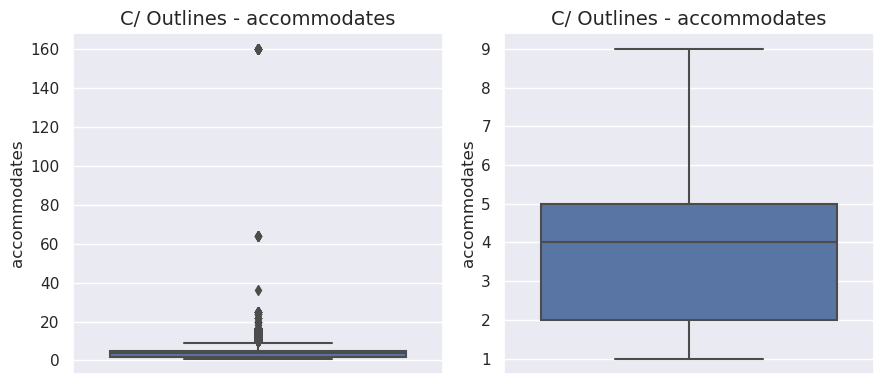

linhas exluidas 25317


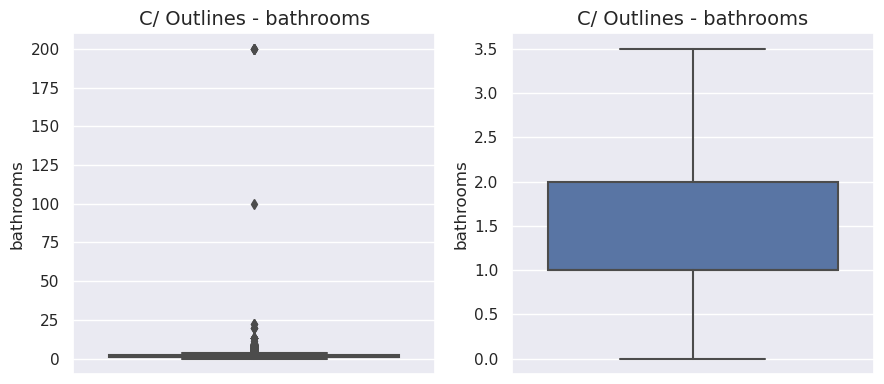

linhas exluidas 13664


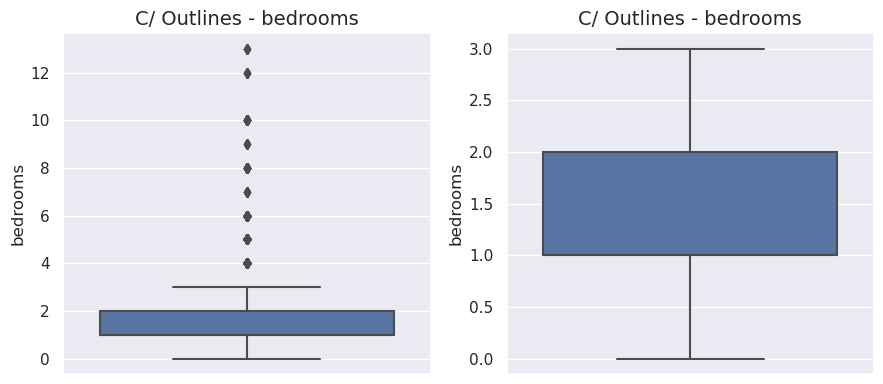

linhas exluidas 8280


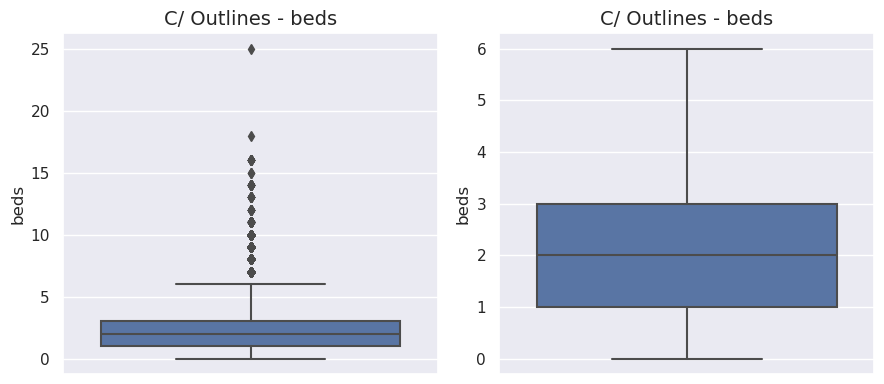

linhas exluidas 5834


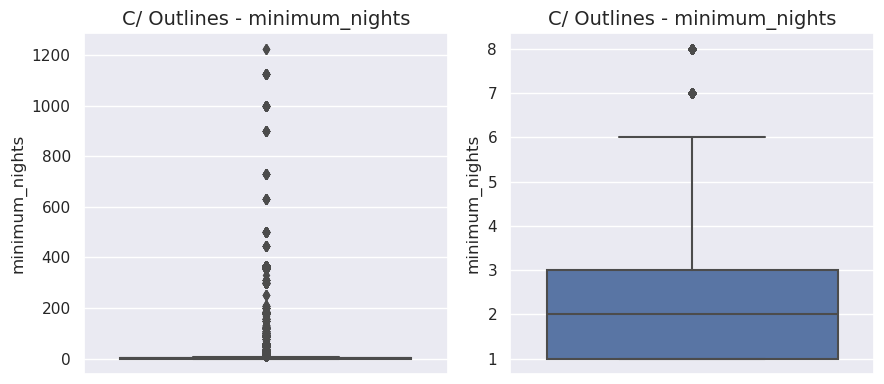

linhas exluidas 38368


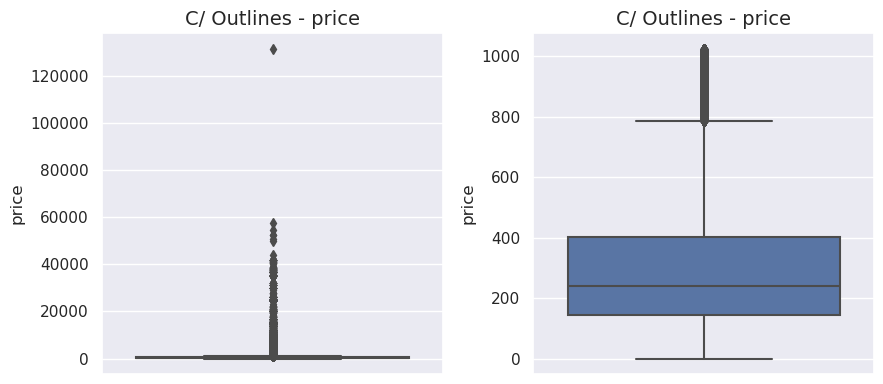

linhas exluidas 39603


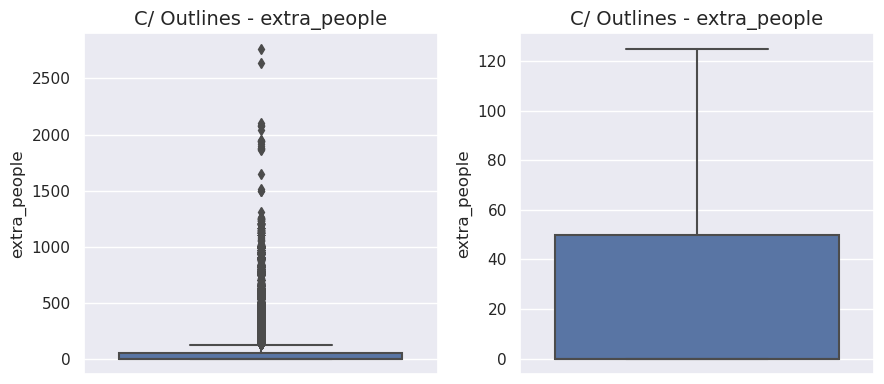

linhas exluidas 30929


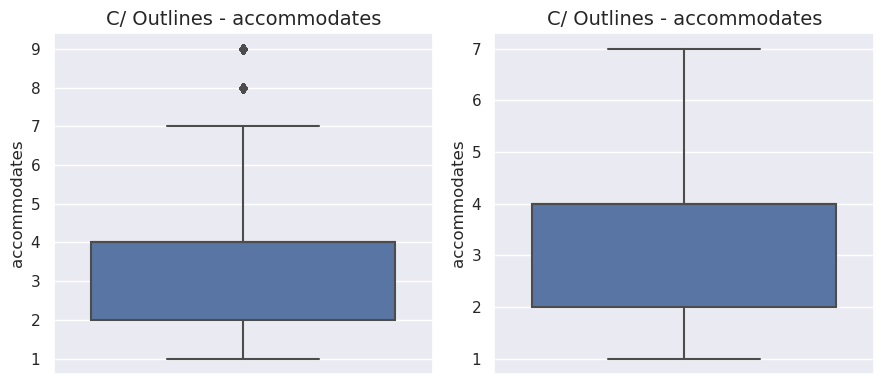

linhas exluidas 8642


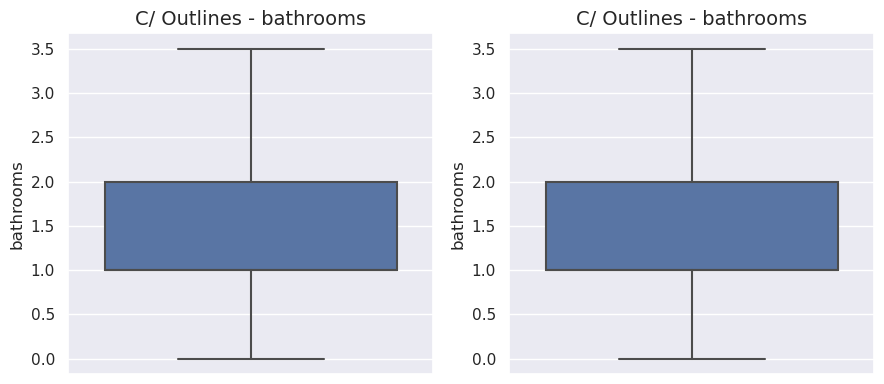

linhas exluidas 0


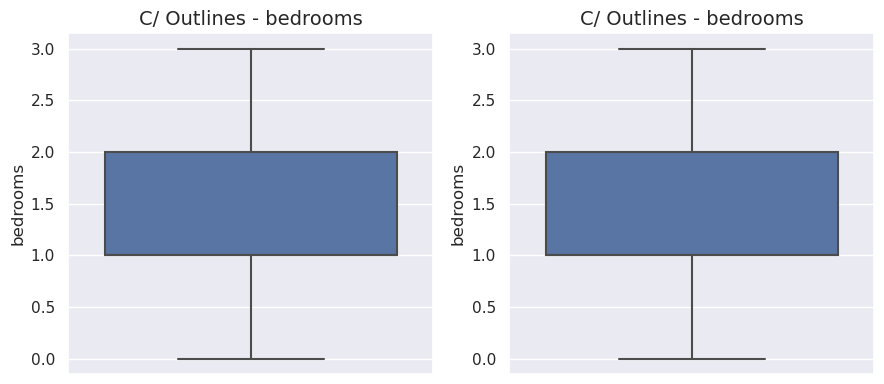

linhas exluidas 0


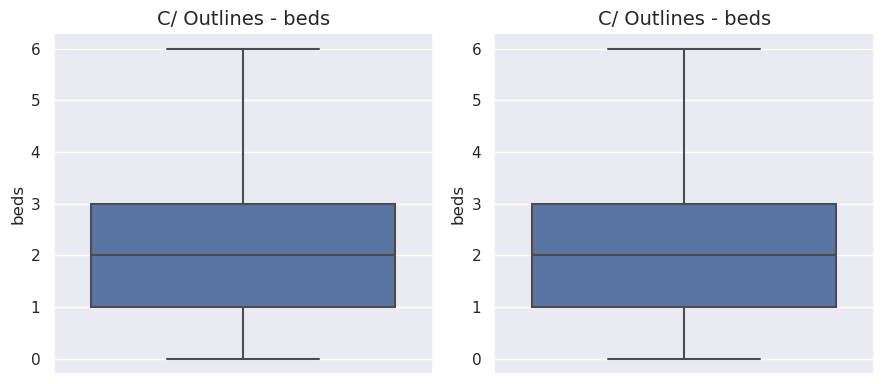

linhas exluidas 0


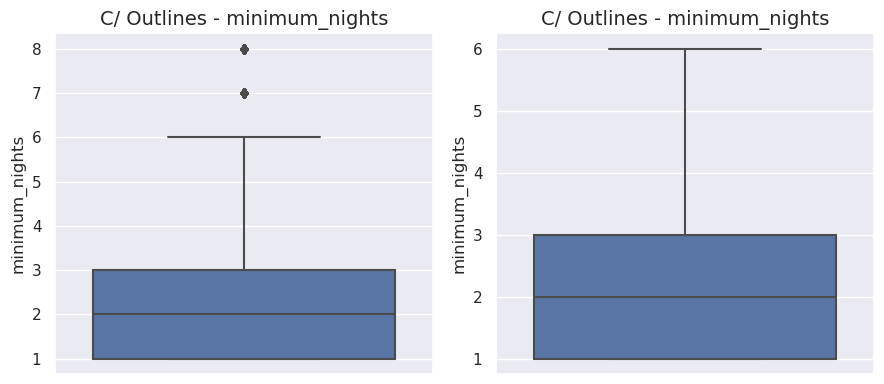

linhas exluidas 18447


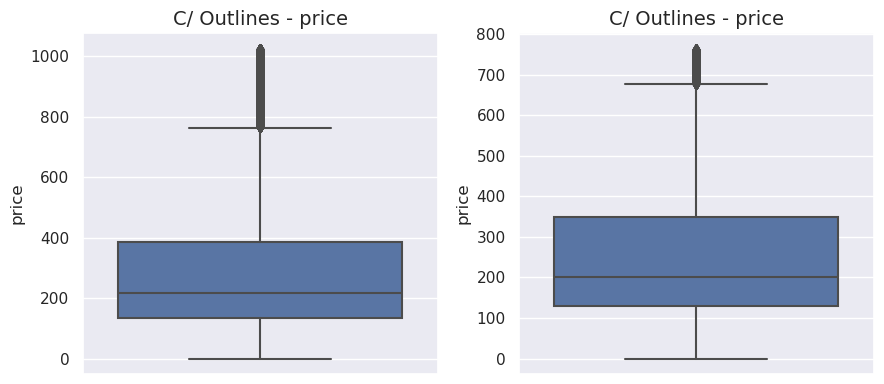

linhas exluidas 23274


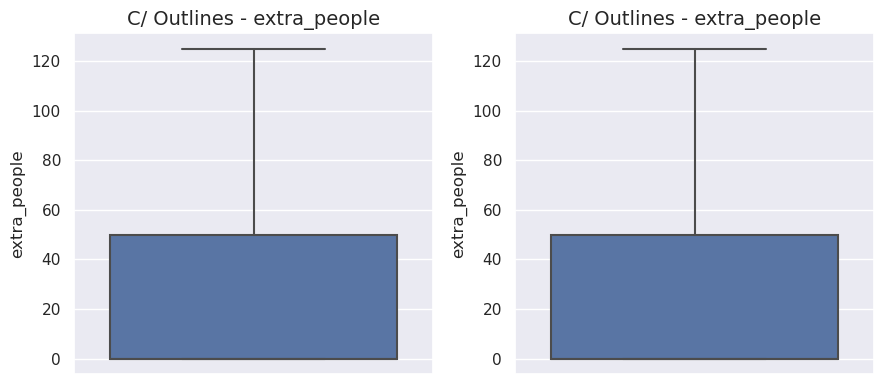

linhas exluidas 0


In [7]:
def box_plot(df1,df2,col):
    
    #config
    fundo='darkgrid'
    sns.set(style=fundo)
    fig, (x1, x2) = plt.subplots(1, 2, figsize=(9, 4))

    sns.boxplot(data=df1, y=col, ax=x1)
    x1.set_title(f'C/ Outlines - {col}', fontsize=14)
    x1.tick_params(axis='x', rotation=30)
    
    sns.boxplot(data=df2, y=col, ax=x2)
    x2.set_title(f'C/ Outlines - {col}', fontsize=14)
    x2.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()
    
def excluir_outlines(df,col):
    
       
    #medindo o limite inferir e superior
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - (1.5 * iqr)
    limite_sup = q3 + (1.5 * iqr)
    
    df_new = df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]
    
    box_plot(df, df_new, col)
    print(f'linhas exluidas {df.shape[0] - df_new.shape[0]}')
    
    return df_new

cols_train = [
        'accommodates', 
        'bathrooms', 
        'bedrooms', 
        'beds', 
        'minimum_nights',
        'price',
        'extra_people']


df_copy = df_train.copy()

for col in cols_train:
    df_copy = excluir_outlines(df_copy, col)

for col in cols_train:
    df_copy = excluir_outlines(df_copy, col)

In [8]:
for i in df_test.columns:
    print(i,df_test[i].max())

latitude -22.750379829867484
longitude -43.10406
accommodates 160.0
bathrooms 200.0
bedrooms 45.0
beds 69.0
extra_people 4442.0
minimum_nights 1224.0
instant_bookable 1.0
property_type Outras
room_type Shared room


# Pre-Preocessamento - Test

In [9]:
# host_is_superhost e instant_boolable - binarary
df_test['instant_bookable'] = df_test['instant_bookable'].replace({'f': 0, 't': 1})

#object
for col in df_test.columns:
    if (df_test[col].dtype == 'object' or df_test[col].dtype == 'int64') and col not in ['room_type','property_type']:
        df_test[col] = df_test[col].astype(np.float64, copy=False)

propriedades_importantes = ["Condominium", "House", "Apartment"]
df_test['property_type'] = df_test['property_type'].apply(lambda prop: prop if prop in propriedades_importantes else 'Outras')

print(df_test.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitude          196030 non-null  float64
 1   longitude         196030 non-null  float64
 2   accommodates      196030 non-null  float64
 3   bathrooms         196030 non-null  float64
 4   bedrooms          196030 non-null  float64
 5   beds              196030 non-null  float64
 6   extra_people      196030 non-null  float64
 7   minimum_nights    196030 non-null  float64
 8   instant_bookable  196030 non-null  float64
 9   property_type     196030 non-null  object 
 10  room_type         196030 non-null  object 
dtypes: float64(9), object(2)
memory usage: 16.5+ MB
None


In [10]:
df_train.head()

latitude  longitude  accommodates  bathrooms  bedrooms  beds  \
0 -22.935381 -43.199022           6.0        1.0       1.0   4.0   
1 -22.912320 -43.219480           5.0        1.0       3.0   3.0   
2 -22.965607 -43.409884           4.0        1.0       2.0   3.0   
3 -23.030740 -43.477210           5.0        2.5       2.0   4.0   
4 -22.949252 -43.388894           4.0        2.0       2.0   3.0   

   extra_people  minimum_nights  instant_bookable property_type  \
0          82.0             1.0               0.0         House   
1           0.0            10.0               0.0     Apartment   
2           0.0            30.0               1.0     Apartment   
3          75.0             2.0               0.0     Apartment   
4          88.0             7.0               0.0         House   

         room_type   price  
0     Private room   229.0  
1  Entire home/apt  1502.0  
2  Entire home/apt   569.0  
3  Entire home/apt   499.0  
4     Private room   132.0

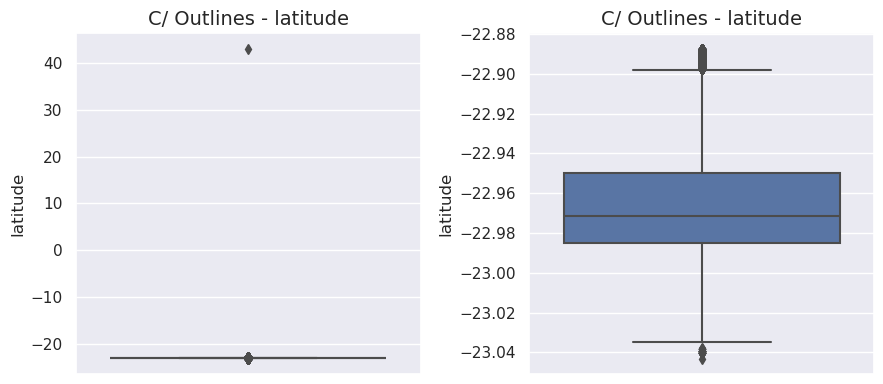

linhas exluidas 13061


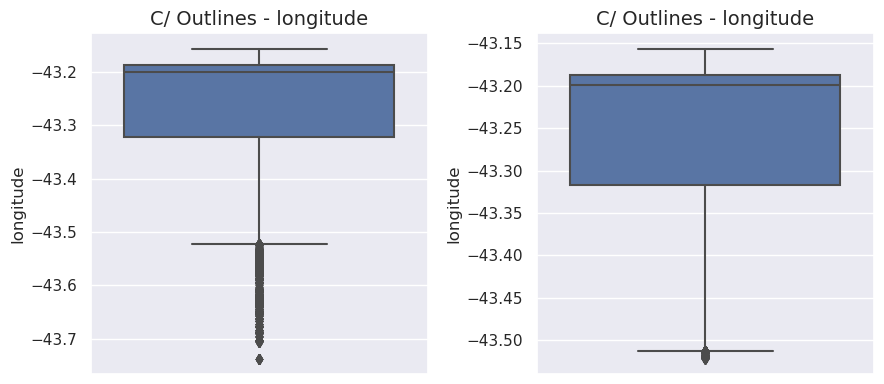

linhas exluidas 3313


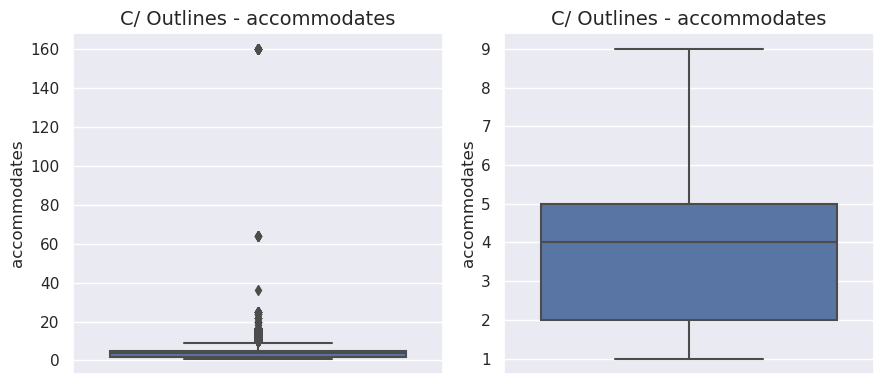

linhas exluidas 23799


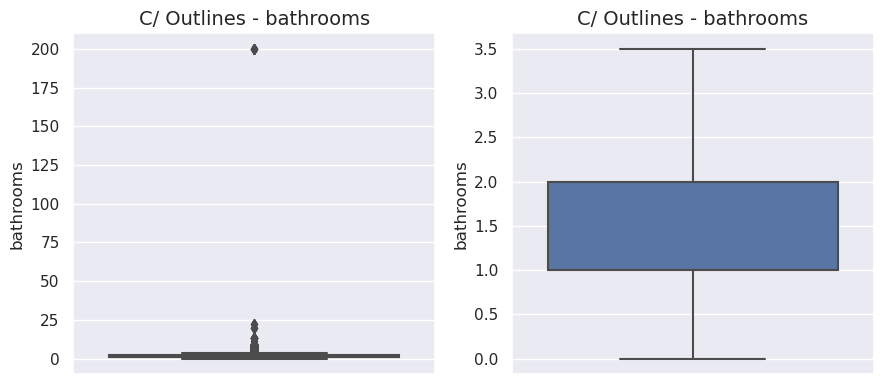

linhas exluidas 13341


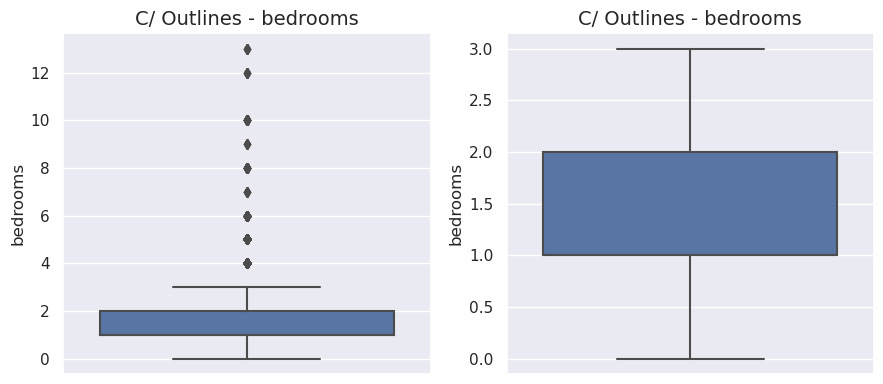

linhas exluidas 8045


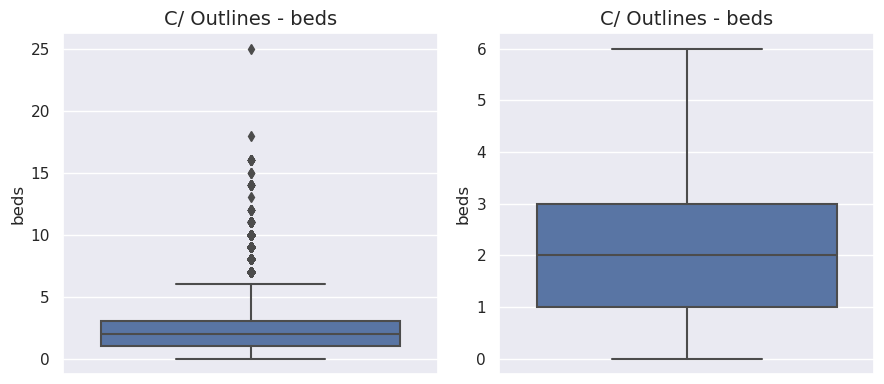

linhas exluidas 5669


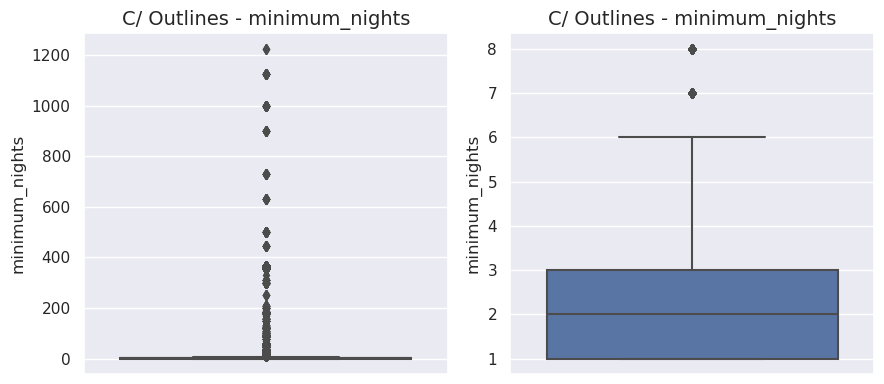

linhas exluidas 37478


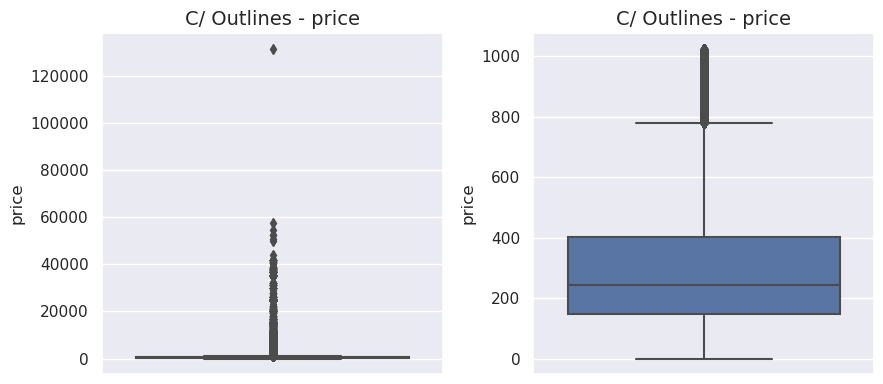

linhas exluidas 38976


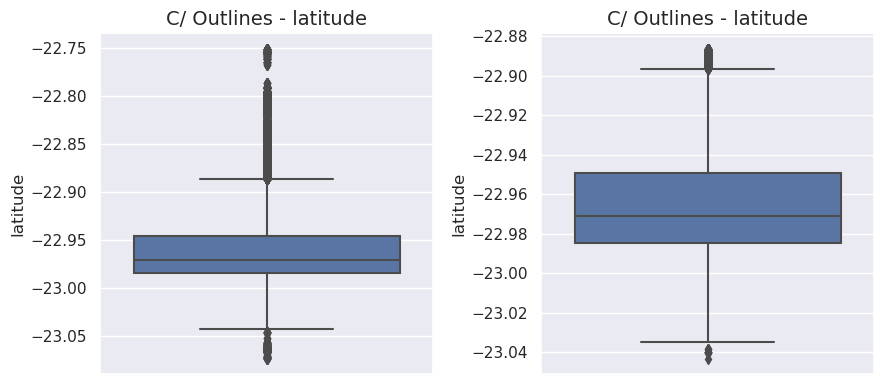

linhas exluidas 4251


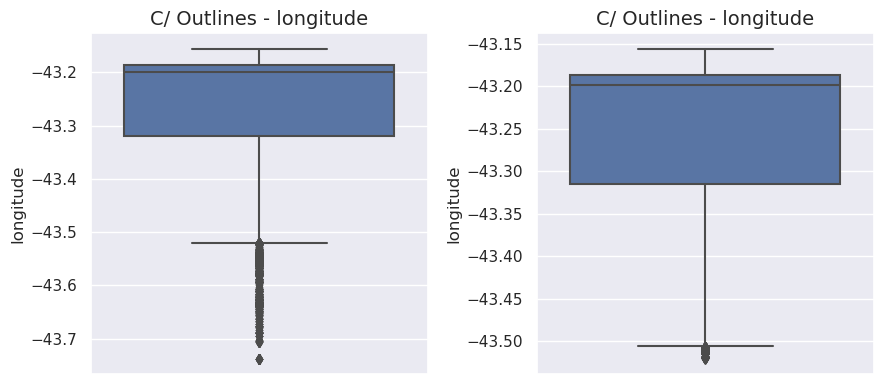

linhas exluidas 1169


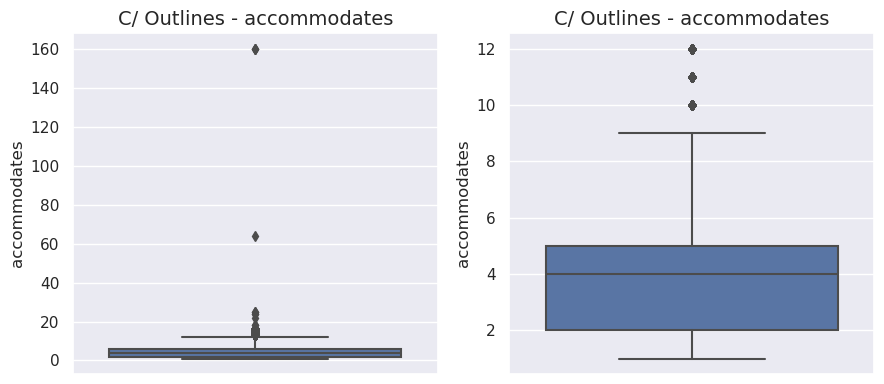

linhas exluidas 2252


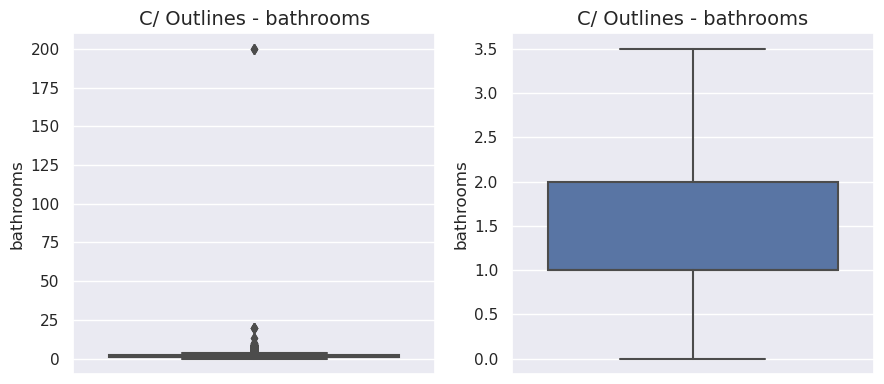

linhas exluidas 6925


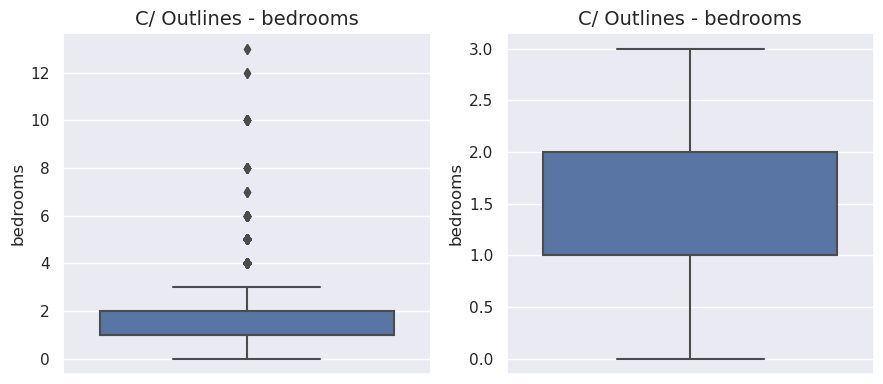

linhas exluidas 3784


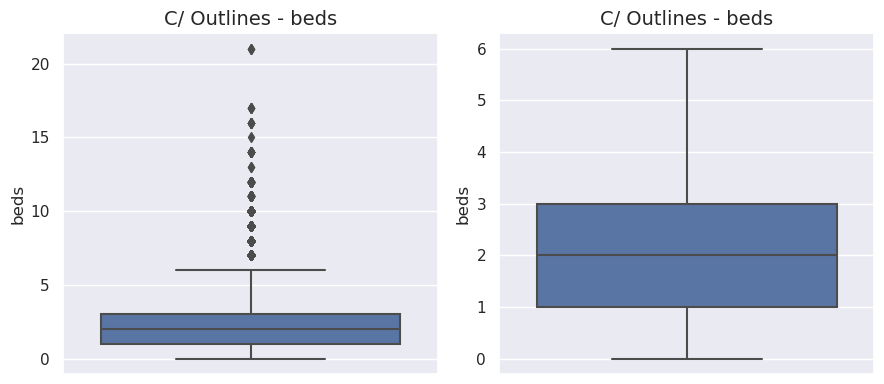

linhas exluidas 2669


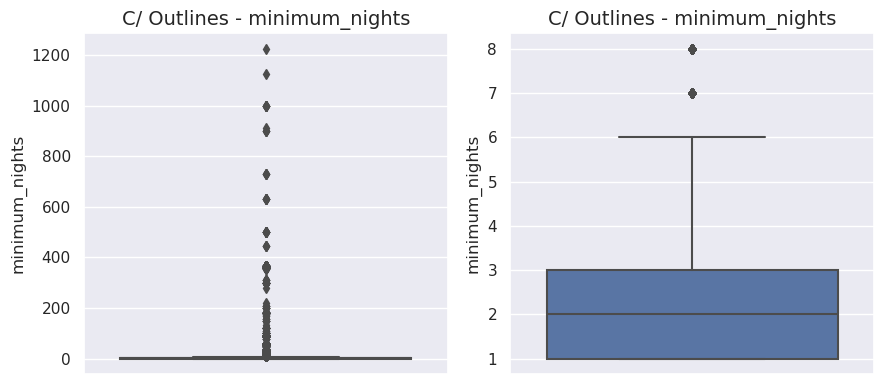

linhas exluidas 12437


In [11]:
def box_plot(df1,df2,col):
    
    #config
    fundo='darkgrid'
    sns.set(style=fundo)
    fig, (x1, x2) = plt.subplots(1, 2, figsize=(9, 4))

    sns.boxplot(data=df1, y=col, ax=x1)
    x1.set_title(f'C/ Outlines - {col}', fontsize=14)
    x1.tick_params(axis='x', rotation=30)
    
    sns.boxplot(data=df2, y=col, ax=x2)
    x2.set_title(f'C/ Outlines - {col}', fontsize=14)
    x2.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()
    
def excluir_outlines(df,col):
    
       
    #medindo o limite inferir e superior
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - (1.5 * iqr)
    limite_sup = q3 + (1.5 * iqr)
    
    df_new = df.loc[(df[col] >= limite_inf) & (df[col] <= limite_sup), :]
    
    box_plot(df, df_new, col)
    print(f'linhas exluidas {df.shape[0] - df_new.shape[0]}')
    
    return df_new

cols = ['latitude', 
        'longitude', 
        'accommodates', 
        'bathrooms', 
        'bedrooms', 
        'beds', 
        'minimum_nights',
        'price']

df_train = df_train

df_train = excluir_outlines(df_train, 'latitude')
df_train = excluir_outlines(df_train, 'longitude')
df_train = excluir_outlines(df_train, 'accommodates')
df_train = excluir_outlines(df_train, 'bathrooms')
df_train = excluir_outlines(df_train, 'bedrooms')
df_train = excluir_outlines(df_train, 'beds')
df_train = excluir_outlines(df_train, 'minimum_nights')
df_train = excluir_outlines(df_train, 'price')

df_test = excluir_outlines(df_test, 'latitude')
df_test = excluir_outlines(df_test, 'longitude')
df_test = excluir_outlines(df_test, 'accommodates')
df_test = excluir_outlines(df_test, 'bathrooms')
df_test = excluir_outlines(df_test, 'bedrooms')
df_test = excluir_outlines(df_test, 'beds')
df_test = excluir_outlines(df_test, 'minimum_nights')



# ENCODING

**Aplicando encoding!**

In [12]:
#aplicando encoding nas tabelas cartegoricas 
df_train = pd.get_dummies(df_train, columns=['property_type', 'room_type']).astype(float)
df_test = pd.get_dummies(df_test, columns=['property_type', 'room_type']).astype(float)

print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 162543 entries, 0 to 196029
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   latitude                   162543 non-null  float64
 1   longitude                  162543 non-null  float64
 2   accommodates               162543 non-null  float64
 3   bathrooms                  162543 non-null  float64
 4   bedrooms                   162543 non-null  float64
 5   beds                       162543 non-null  float64
 6   extra_people               162543 non-null  float64
 7   minimum_nights             162543 non-null  float64
 8   instant_bookable           162543 non-null  float64
 9   property_type_Apartment    162543 non-null  float64
 10  property_type_Condominium  162543 non-null  float64
 11  property_type_House        162543 non-null  float64
 12  property_type_Outras       162543 non-null  float64
 13  room_type_Entire home/apt  162543 

# Teste de validacao do modelo

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444409 entries, 0 to 588090
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   latitude                   444409 non-null  float64
 1   longitude                  444409 non-null  float64
 2   accommodates               444409 non-null  float64
 3   bathrooms                  444409 non-null  float64
 4   bedrooms                   444409 non-null  float64
 5   beds                       444409 non-null  float64
 6   extra_people               444409 non-null  float64
 7   minimum_nights             444409 non-null  float64
 8   instant_bookable           444409 non-null  float64
 9   price                      444409 non-null  float64
 10  property_type_Apartment    444409 non-null  float64
 11  property_type_Condominium  444409 non-null  float64
 12  property_type_House        444409 non-null  float64
 13  property_type_Outras       444409 

In [14]:
df_train['price'].max()

1025.0

In [15]:
def predict_vs_real(y_predic, y_real, nomeModel):
    y_real = y_real[:len(y_predic)]
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=y_real, y=y_pred, alpha=0.6, marker='x', label='Valores Previstos', color='red')  
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'b-.', lw=2)
    plt.xlabel('Valores Reais', fontsize=12, fontweight='bold')
    plt.ylabel('Valores Previstos', fontsize=12, fontweight='bold')
    plt.title(f'Comparco de precos reais e previstos: {nomeModel}', fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.show()

In [16]:

#preprocesso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#models
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#outra biblioteca
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS



train = df_train.copy()
test = df_test.copy()
print(train.columns)
 
X = train.drop('price', axis=1)
y = train['price']
x_test = test


"""cria modelo e compar eles, mostrando"""
X = train.drop('price', axis=1)
y = train['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelos = {
        "ElasticNet" : ElasticNet(),
        "LinearRegression" : LinearRegression(),
        "DecisionTreeClassifier" : DecisionTreeClassifier()
}

#escolhas de normalizacao implemntar:
norm = StandardScaler()
X_train_normalizado = norm.fit_transform(X_train)
X_test_normalizado = norm.transform(X_test)

x_test_true_normalizado = norm.transform(test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_normalizado)
X_test_pca = pca.transform(X_test_normalizado)

for nome, modelo in modelos.items():
        modelo.fit(X_train_pca, y_train)
        y_pred = modelo.predict(X_test_pca)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        print(f"""
                Demostracao das Metricas do modelo({nome})
                - MAE: {mae}
                - MSE: {mse}
                - R2: {r2}
        """)


X_train_sm = sm.add_constant(X_train_normalizado)
model_sm = sm.OLS(y_pred, X_test_normalizado).fit()
print(model_sm.summary())


Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'extra_people', 'minimum_nights', 'instant_bookable', 'price',
       'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Outras',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

                Demostracao das Metricas do modelo(ElasticNet)
                - MAE: 151.75325262069015
                - MSE: 40333.03948897278
                - R2: 0.241963813201293
        

                Demostracao das Metricas do modelo(LinearRegression)
                - MAE: 149.69793440692766
                - MSE: 39887.55409359152
                - R2: 0.2503364539610269
        

                Demostracao das Metricas do modelo(DecisionTreeClassifier)
                - MAE: 19.67740749908118
                - MSE: 5151.834784695814
                - R2: 0.9031742401

**SEM PCA***

                Demostracao das Metricas do modelo
                - MSA: 40109.55389651671
                - MSE: 151.23381616020612
                - R2: 0.24616409585929033
        

                Demostracao das Metricas do modelo
                - MSA: 39551.44414791116
                - MSE: 148.81851373575583
                - R2: 0.25665344630271036
        

                Demostracao das Metricas do modelo
                - MSA: 4531.9171935825025
                - MSE: 17.9343849148309
                - R2: 0.9148252333115133

# Resultado do modelo

- Grafico dos modelos logo abaixo, valores reais na linha azul.

Teste final, treinando modelo de precos x_test_true - SEM PCA


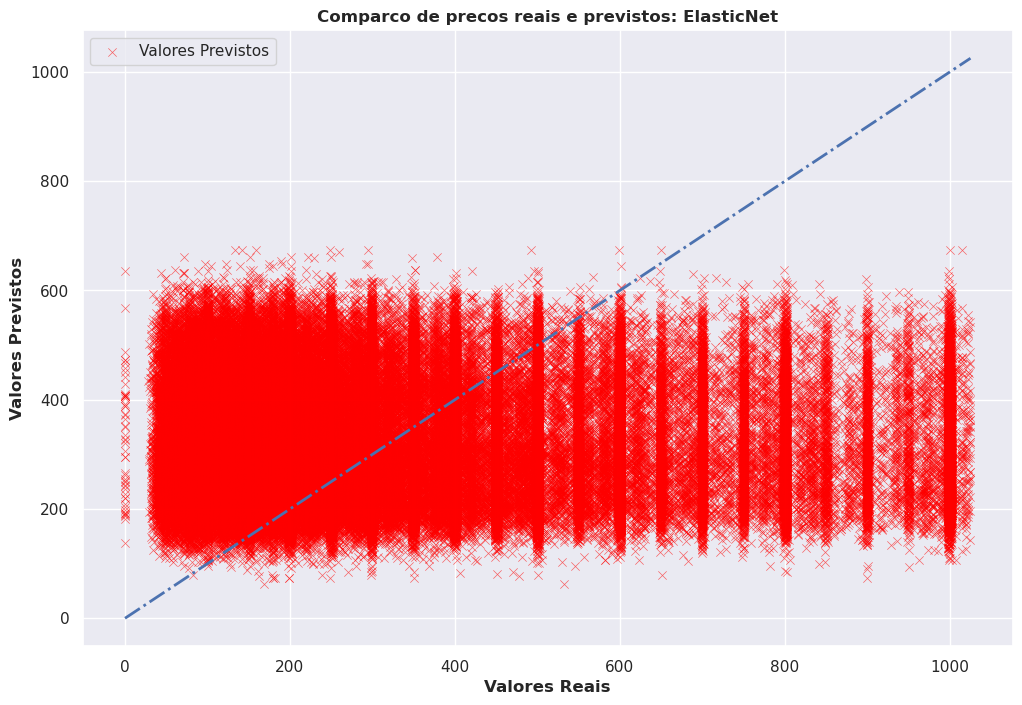

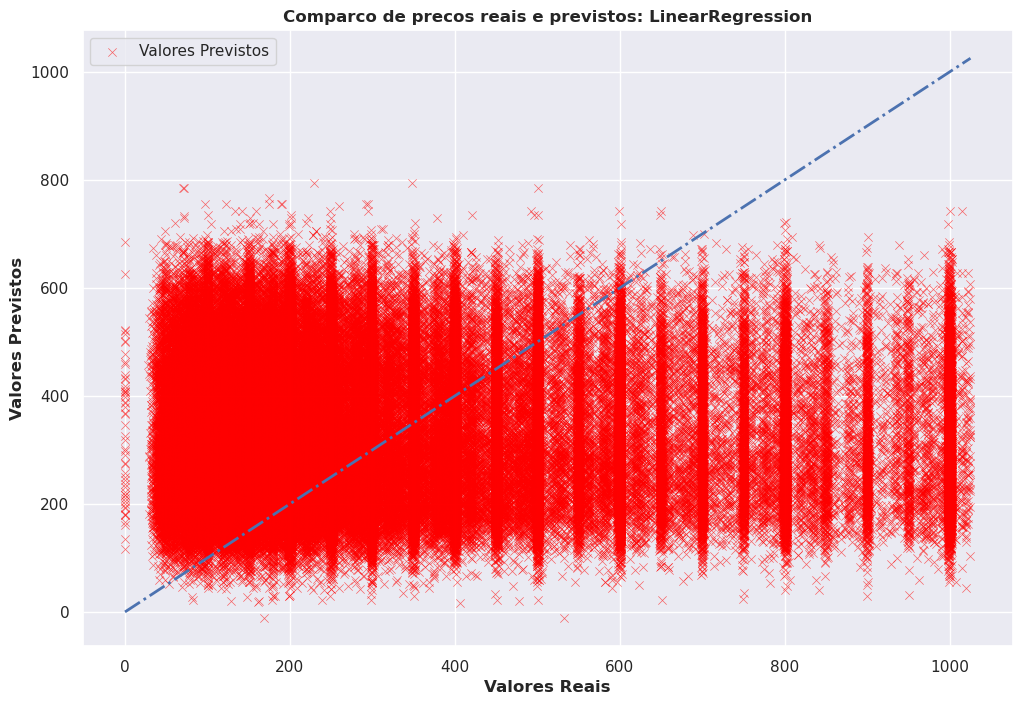

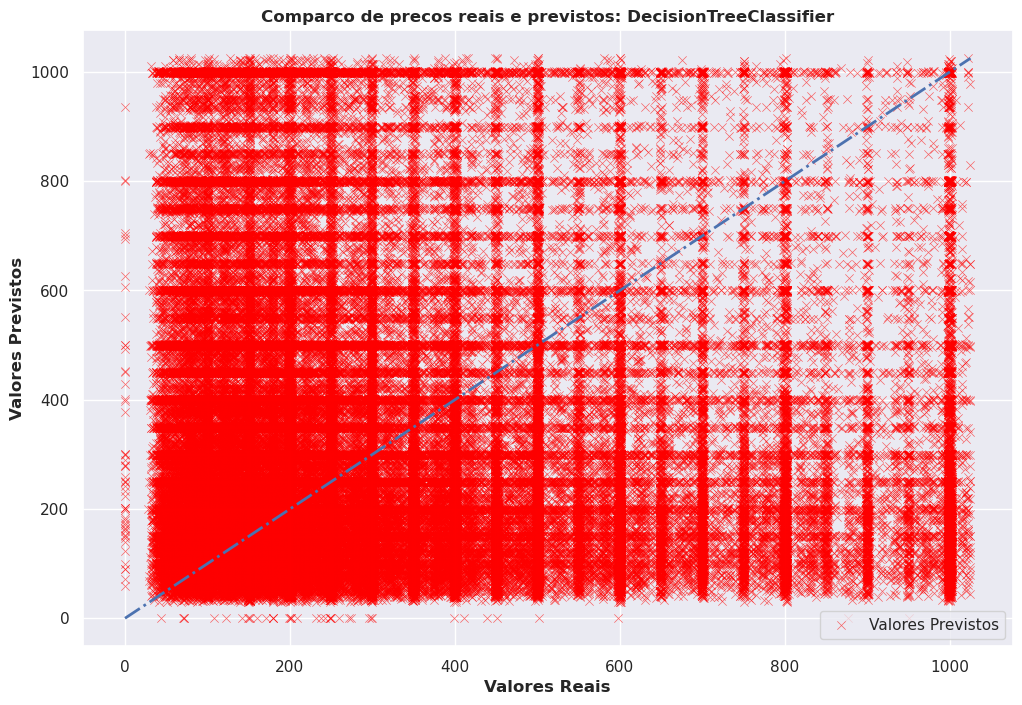

In [17]:
print("""Teste final, treinando modelo de precos x_test_true - SEM PCA""")

for nome, modelo in modelos.items():
        modelo.fit(X_train_normalizado, y_train)
        y_pred = modelo.predict(x_test_true_normalizado)
        predict_vs_real(y_pred, y_train, nome)

Teste final, treinando modelo de precos x_test_true - Com PCA


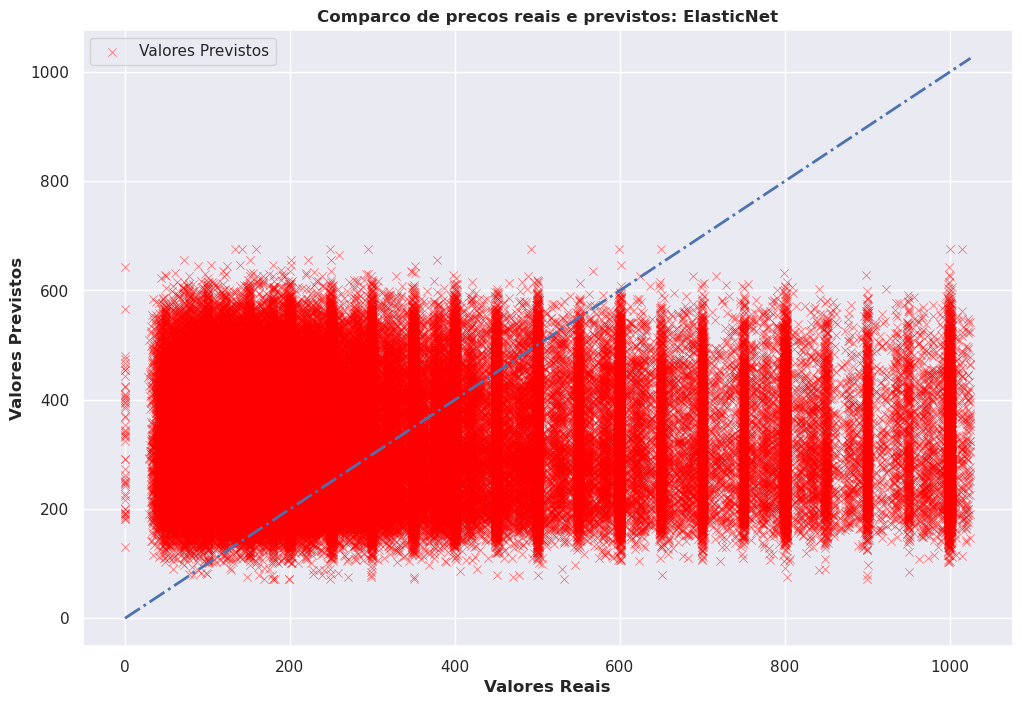

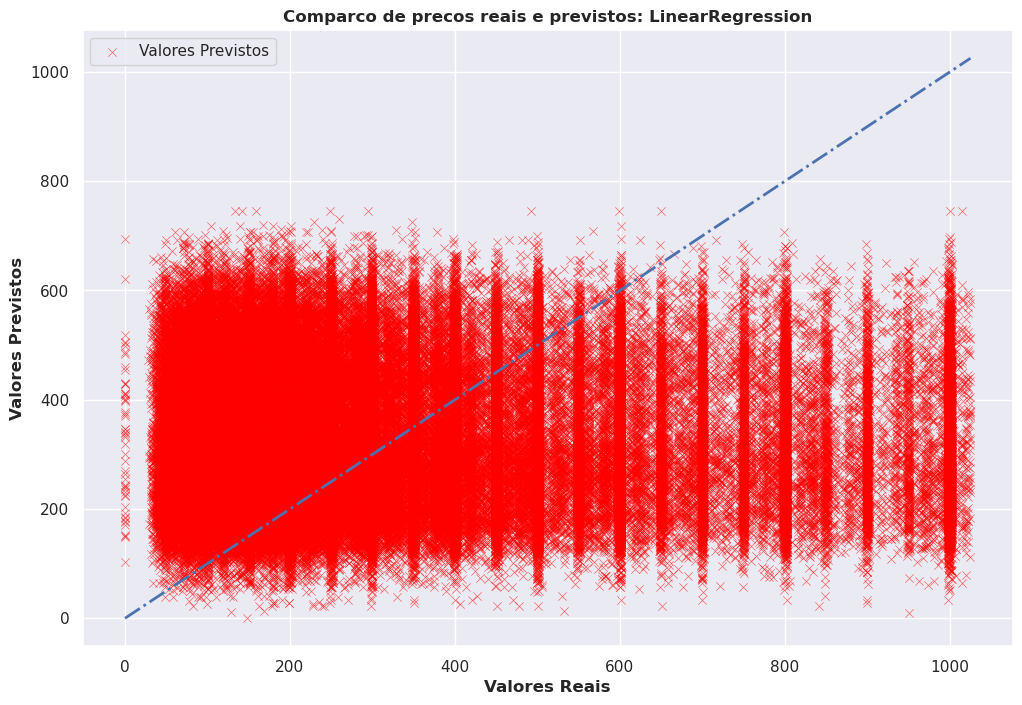

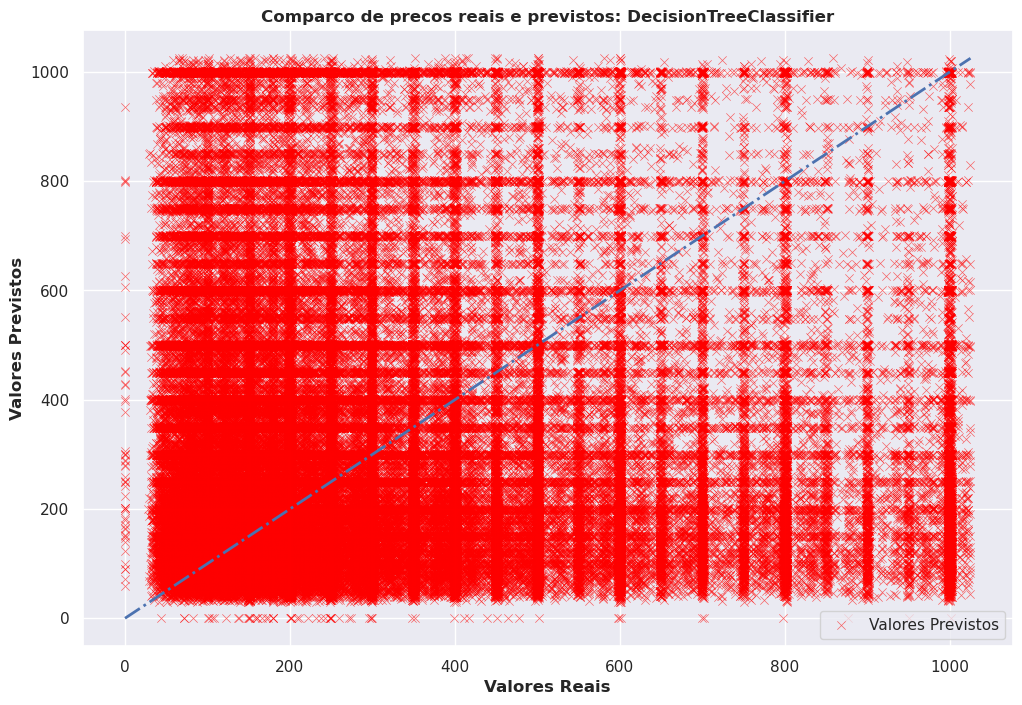

In [18]:
print("""Teste final, treinando modelo de precos x_test_true - Com PCA""")
x_test_true_pca = pca.transform(x_test_true_normalizado)
for nome, modelo in modelos.items():
        modelo.fit(X_train_pca, y_train)
        y_pred = modelo.predict(x_test_true_pca)
        predict_vs_real(y_pred, y_train, nome)

In [19]:
y_format = np.round(y_pred, 2)
final_predic = pd.DataFrame({
    'price_predict': y_format}, index=range(len(y_pred)))

final_predic.to_excel('final_predic.xlsx', index=True)
print(final_predic.head(20))

    price_predict
0           306.0
1           159.0
2           133.0
3            71.0
4           146.0
5            79.0
6           882.0
7           259.0
8           282.0
9           109.0
10          334.0
11          473.0
12          140.0
13          240.0
14          485.0
15          251.0
16          108.0
17          299.0
18           99.0
19          210.0
